# Vibrational frequencies

## Manual calculation of vibrational frequency

The principle idea in calculating vibrational frequencies is that we consider a **molecular** system as ****masses** connected by **springs**. If the springs are Hookean, e.g. the force is proportional to the displacement, then we can readily solve the equations of motion and find that the *vibrational frequencies* are related to the *force constants* and the *masses of the atoms*. 

For example, in a simple molecule like CO where there is only one spring, the frequency is:

$\nu = \frac{1}{2\pi} \sqrt{k/\mu}$ where $\frac{1}{\mu} = \frac{1}{m_C} + \frac{1}{m_O}$ and $k$ in the spring constant.

We will compute the value of $k$ from DFT calculations as follows $k = \frac{\partial^2 E}{\partial x^2}$ at the equilibrium bond length. We actually already have the data to do this from [Manual determination of a bond length](./2_4_mol_geo_optimization.html#manual-determination-of-a-bond-length). We only need to fit an equation to the energy vs. bond-length data, find the minimum energy bond-length, and then evaluate the second derivative of the fitted function at the minimum. 

We will use a cubic polynomial for demonstration here. Polynomials are numerically convenient because they are easy to fit, and it is trivial to get the roots and derivatives of the polynomials, as well as to evaluate them at other points using `numpy.polyfit`, `numpy.polyder`, and `numpy.polyval`.

In [1]:
from gpaw import restart
import numpy as np
from ase.units import kg, J, m
from ase.data import atomic_masses

bond_lengths = [1.05, 1.1, 1.15, 1.2, 1.25]
energies = []
for d in bond_lengths:
    mol, calc = restart('molecules/simple_CO_d{}.gpw'.format(d))
    energies.append(mol.get_potential_energy())

# fit the data
pars = np.polyfit(bond_lengths, energies, 3)
xfit = np.linspace(1.05, 1.25)
efit = np.polyval(pars, xfit)

# first derivative
dpars = np.polyder(pars)
# find where the minimum is. chose the second one because it is the minimum we need.
droots = np.roots(dpars)

# second derivative
ddpars = np.polyder(dpars)

d_min = droots[np.polyval(ddpars, droots) > 0]

# curvature at minimum = force constant in SI units
k = np.polyval(ddpars, d_min) / (J / m**2)

# mu, reduced mass
C_mass = atomic_masses[6] / kg
O_mass = atomic_masses[8] / kg

mu = 1.0 / (1.0 / C_mass + 1.0 / O_mass)

frequency = 1. / (2. * np.pi) * np.sqrt(k / mu)
print('The CO vibrational frequency is {0} Hz'.format(*frequency))
print('The CO vibrational frequency is {0[0]} cm^{{-1}}'.format(frequency / 3e10))

The CO vibrational frequency is 64876008880843.62 Hz
The CO vibrational frequency is 2162.533629361454 cm^{-1}


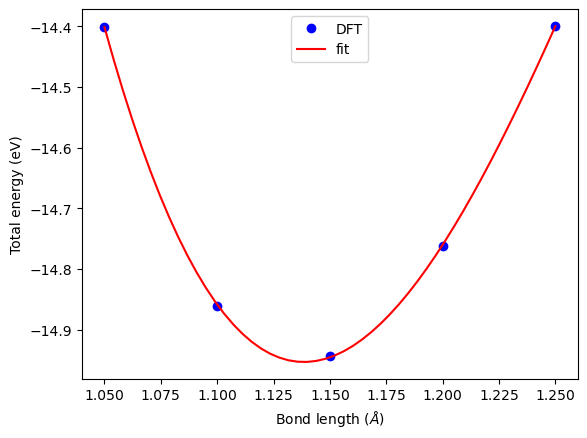

In [11]:
import matplotlib.pyplot as plt
plt.plot(bond_lengths, energies, 'bo', label='DFT')
plt.plot(xfit, efit, 'r-', label='fit')
plt.xlabel('Bond length ($\AA$)')
plt.ylabel('Total energy (eV)')
plt.legend(loc='upper center')
plt.show()

## Automated vibrational calculations



### Zero-point energy for multiple modes